<a href="https://colab.research.google.com/github/dezani02/-geog4518.github.io/blob/main/docs/workshops/GeoAI_Workshop_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/workshops/GeoAI_Workshop_2025.ipynb)

# Object Detection from Remote Sensing Imagery with GeoAI

- 📓 **Notebook**: <https://opengeoai.org/workshops/GeoAI_Workshop_2025>  
- 💻 **GitHub**: <https://github.com/opengeos/geoai>

---

## 🧭 Introduction

This notebook provides hands-on materials for using the GeoAI package for object detection in remote sensing imagery.

## 🗂️ Agenda

The workshop will guide you through the full pipeline of GeoAI for object detection in remote sensing imagery, including:

- 📦 Package installation  
- ⬇️ Data download  
- 🖼️ Data visualization  
- 🧠 Model training  
- 🔍 Model inference  
- 🛠️ Post-processing  
- 🌐 Real-world applications  

## ⚙️ Prerequisites

- A Google Colab account (recommended for ease of setup)
- Basic familiarity with Python and geospatial data

## 📦 Package installation

You can install the required packages using either `conda` or `pip`:

### Option 1: Using Conda (recommended for local environments)

```bash
conda create -n geoai python=3.12
conda activate geoai
conda install -c conda-forge mamba
mamba install -c conda-forge geoai
```

### Option 2: Using pip (for Colab or quick installation)

In [5]:
%pip install geoai-py overturemaps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.1/568.1 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7

## ⬇️ Data download

### Import library

In [6]:
import geoai

### Retrieve collections

Get all STAC collections from [Microsoft Planetary Computer](https://planetarycomputer.microsoft.com/catalog).

In [7]:
collections = geoai.pc_collection_list()
collections

Retrieved 126 collections from Planetary Computer


id                                           title  \
42  3dep-lidar-classification                  USGS 3DEP Lidar Classification   
28            3dep-lidar-copc                     USGS 3DEP Lidar Point Cloud   
3              3dep-lidar-dsm           USGS 3DEP Lidar Digital Surface Model   
43             3dep-lidar-dtm           USGS 3DEP Lidar Digital Terrain Model   
41      3dep-lidar-dtm-native  USGS 3DEP Lidar Digital Terrain Model (Native)   
..                        ...                                             ...   
16               terraclimate                                    TerraClimate   
55                  us-census                                       US Census   
85                   usda-cdl                USDA Cropland Data Layers (CDLs)   
90       usgs-lcmap-conus-v13                 USGS LCMAP CONUS Collection 1.3   
91      usgs-lcmap-hawaii-v10                USGS LCMAP Hawaii Collection 1.0   

                                          description  
42  This collection is derived from the [USGS 3DEP...  
28  This collection contains source data from the ...  
3   This collection is derived from the [USGS 3DEP...  
43  This collection is derived from the [USGS 3DEP...  
41  This collection is derived from the [USGS 3DEP...  
..                                                ...  
16  [TerraClimate](http://www.climatologylab.org/t...  
55  The [2020 Census](https://www.census.gov/progr...  
85  The Cropland Data Layer (CDL) is a product of ...  
90  The [Land Change Monitoring, Assessment, and P...  
91  The [Land Change Monitoring, Assessment, and P...  

[126 rows x 3 columns]

### Search NAIP imagery

In [8]:
m = geoai.Map(center=[47.653010, -117.592167], zoom=16)
m

Map(center=[47.65301, -117.592167], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [9]:
bbox = m.user_roi_bounds()
if bbox is None:
    bbox = [-117.6021, 47.6502, -117.5824, 47.6559]

In [10]:
items = geoai.pc_stac_search(
    collection="naip",
    bbox=bbox,
    time_range="2013-01-01/2024-12-31",
)

Found 6 items matching search criteria


In [11]:
items

[<Item id=wa_m_4711720_sw_11_060_20230701_20230911>,
 <Item id=wa_m_4711720_sw_11_060_20210627>,
 <Item id=wa_m_4711720_sw_11_060_20190726_20191217>,
 <Item id=wa_m_4711720_sw_11_1_20170717_20171128>,
 <Item id=wa_m_4711720_sw_11_1_20150702_20160104>,
 <Item id=wa_m_4711720_sw_11_1_20130628_20130820>]

In [12]:
items[0]

<Item id=wa_m_4711720_sw_11_060_20230701_20230911>

### Visualize NAIP imagery

In [13]:
geoai.pc_item_asset_list(items[0])

['image', 'thumbnail', 'tilejson', 'rendered_preview']

In [14]:
geoai.view_pc_item(item=items[0])

### Download NAIP imagery

In [15]:
downloaded = geoai.pc_stac_download(
    items[0], output_dir="data", assets=["image", "thumbnail"]
)

Processing STAC item: wa_m_4711720_sw_11_060_20230701_20230911



Downloaded 2 assets for 1 items


In [16]:
items[0]

<Item id=wa_m_4711720_sw_11_060_20230701_20230911>

### Search Landsat data

In [17]:
items = geoai.pc_stac_search(
    collection="landsat-c2-l2",
    bbox=bbox,
    time_range="2023-07-01/2023-07-15",
    query={"eo:cloud_cover": {"lt": 1}},
    max_items=10,
)

Found 2 items matching search criteria


In [18]:
items

[<Item id=LC09_L2SP_043027_20230702_02_T1>,
 <Item id=LC08_L2SP_044027_20230701_02_T1>]

In [19]:
items[0]

<Item id=LC09_L2SP_043027_20230702_02_T1>

### Visualize Landsat data

In [20]:
geoai.pc_item_asset_list(items[0])

['qa',
 'ang',
 'red',
 'blue',
 'drad',
 'emis',
 'emsd',
 'trad',
 'urad',
 'atran',
 'cdist',
 'green',
 'nir08',
 'lwir11',
 'swir16',
 'swir22',
 'coastal',
 'mtl.txt',
 'mtl.xml',
 'mtl.json',
 'qa_pixel',
 'qa_radsat',
 'qa_aerosol',
 'tilejson',
 'rendered_preview']

In [21]:
geoai.view_pc_item(item=items[0], assets=["red", "green", "blue"])

In [22]:
geoai.view_pc_item(item=items[0], assets=["nir08", "red", "green"])

In [23]:
geoai.view_pc_item(
    item=items[0],
    expression="(nir08-red)/(nir08+red)",
    rescale="-1,1",
    colormap_name="greens",
    name="NDVI Green",
)

### Download Landsat data

In [24]:
geoai.pc_stac_download(
    items[0], output_dir="data", assets=["nir08", "red", "green", "blue"], max_workers=1
)

Processing STAC item: LC09_L2SP_043027_20230702_02_T1



Downloaded 4 assets for 1 items


{'LC09_L2SP_043027_20230702_02_T1': {'red': 'data/LC09_L2SP_043027_20230702_02_T1_red.tif',
  'blue': 'data/LC09_L2SP_043027_20230702_02_T1_blue.tif',
  'green': 'data/LC09_L2SP_043027_20230702_02_T1_green.tif',
  'nir08': 'data/LC09_L2SP_043027_20230702_02_T1_nir08.tif'}}

### Download building data

In [25]:
buildings_gdf = geoai.get_overture_data(
    overture_type="building",
    bbox=bbox,
    output="data/buildings.geojson",
)

In [26]:
buildings_gdf.head()

id  \
0  c766eb13-0c3e-4bc1-8ea1-13a1d3abb7cf   
1  7c3f17e0-0ef2-4cc9-a9ec-e38985332183   
2  5d2c9a89-0b1b-49a6-adda-aafc7edc03b9   
3  185d5f58-6d41-476f-a234-c6a6499a7e10   
4  e1379be4-2085-4c13-bf53-8613d5e05fc5   

                                            geometry  \
0  POLYGON ((-117.60111 47.65029, -117.60111 47.6...   
1  POLYGON ((-117.60073 47.65042, -117.6008 47.65...   
2  POLYGON ((-117.60019 47.65046, -117.60049 47.6...   
3  POLYGON ((-117.60048 47.65022, -117.60048 47.6...   
4  POLYGON ((-117.59988 47.65046, -117.60012 47.6...   

                                                bbox  version  \
0  {'xmin': -117.60113525390625, 'xmax': -117.600...        1   
1  {'xmin': -117.60081481933594, 'xmax': -117.600...        1   
2  {'xmin': -117.6004867553711, 'xmax': -117.6001...        1   
3  {'xmin': -117.60050201416016, 'xmax': -117.599...        1   
4  {'xmin': -117.6001205444336, 'xmax': -117.5998...        1   

                                             sources  level      subtype  \
0  [{'property': '', 'dataset': 'OpenStreetMap', ...    NaN  residential   
1  [{'property': '', 'dataset': 'OpenStreetMap', ...    NaN         None   
2  [{'property': '', 'dataset': 'OpenStreetMap', ...    NaN         None   
3  [{'property': '', 'dataset': 'OpenStreetMap', ...    NaN  residential   
4  [{'property': '', 'dataset': 'OpenStreetMap', ...    NaN         None   

        class  height names  ...  min_height  min_floor  facade_color  \
0  apartments     NaN  None  ...         NaN        NaN          None   
1        None     NaN  None  ...         NaN        NaN          None   
2        None     NaN  None  ...         NaN        NaN          None   
3  apartments     NaN  None  ...         NaN        NaN          None   
4        None     NaN  None  ...         NaN        NaN          None   

   facade_material  roof_material  roof_shape roof_direction roof_orientation  \
0             None           None        None            NaN             None   
1             None           None        None            NaN             None   
2             None           None        None            NaN             None   
3             None           None        None            NaN             None   
4             None           None        None            NaN             None   

  roof_color roof_height  
0       None         NaN  
1       None         NaN  
2       None         NaN  
3       None         NaN  
4       None         NaN  

[5 rows x 24 columns]

### Extract building statistics

In [27]:
stats = geoai.extract_building_stats(buildings_gdf)
print(stats)

{'total_buildings': 715, 'has_height': 323, 'has_name': 0, 'bbox': [-117.6017984, 47.6501624, -117.5824691, 47.655846]}


## 🖼️ Data Visualization

### Download sample datasets from [Hugging Face](https://huggingface.co/datasets/giswqs/geospatial/tree/main)

In [28]:
train_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train.tif"
)
train_vector_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_train_buildings.geojson"
test_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_test.tif"
)

In [29]:
train_raster_path = geoai.download_file(train_raster_url)
train_vector_path = geoai.download_file(train_vector_url)
test_raster_path = geoai.download_file(test_raster_url)

### View metadata

===== RASTER INFORMATION: naip_train.tif =====
Driver: GTiff
Dimensions: 2503 x 1126 pixels
Number of bands: 4
Data type: uint8
Coordinate Reference System: EPSG:26911
Georeferenced Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Pixel Resolution: 0.5999999999999953, 0.5999999999996691
NoData Value: None

----- Band Statistics -----
Band 1:
  Min: 12.00
  Max: 251.00
  Mean: 150.67
  Std Dev: 48.02
Band 2:
  Min: 49.00
  Max: 251.00
  Mean: 141.92
  Std Dev: 43.47
Band 3:
  Min: 53.00
  Max: 251.00
  Mean: 120.90
  Std Dev: 41.78
Band 4:
  Min: 22.00
  Max: 251.00
  Mean: 159.69
  Std Dev: 54.96


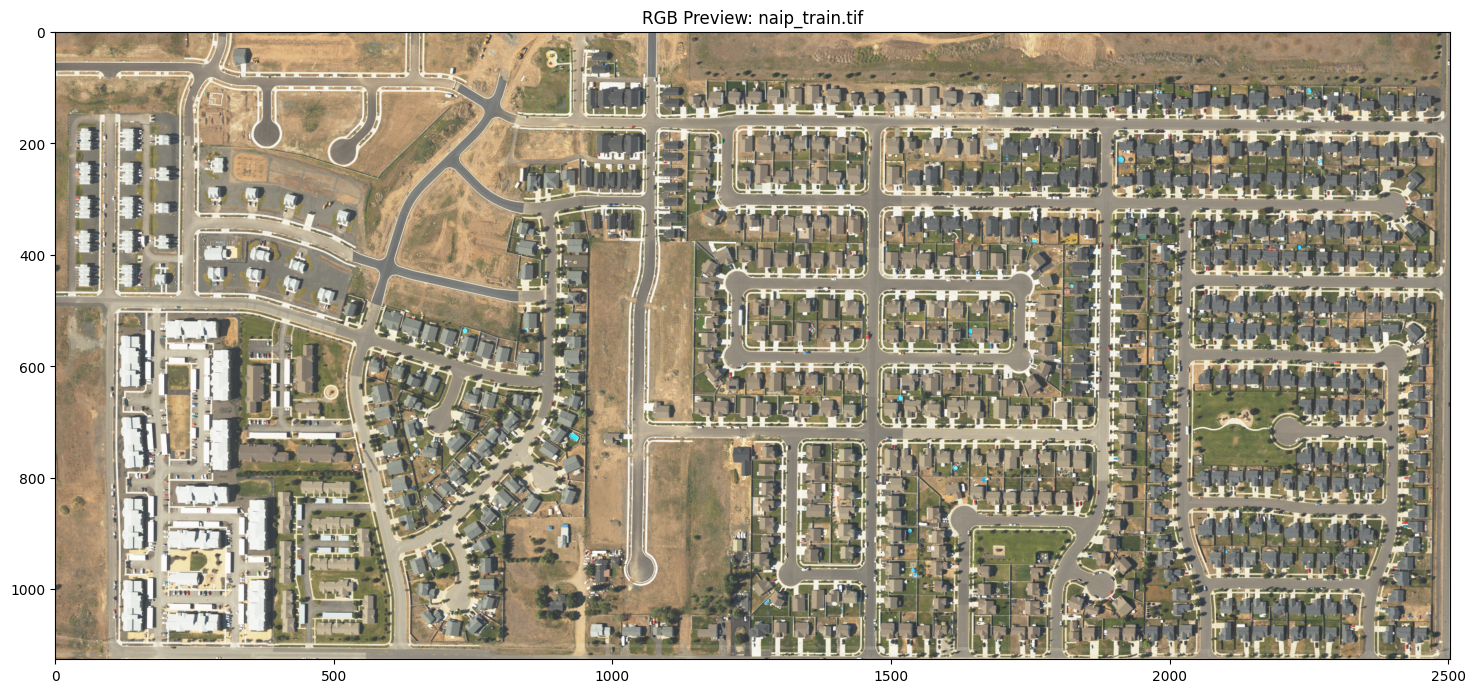

In [30]:
geoai.print_raster_info(train_raster_path, figsize=(18, 10))

===== VECTOR INFORMATION: naip_train_buildings.geojson =====
Driver: GEOJSON
Feature count: 735
Geometry types: {'Polygon': 735}
Coordinate Reference System: EPSG:4326
Bounds: [-117.6017984, 47.65016239407519, -117.58246913360121, 47.655846]
Number of attributes: 3
Attribute names: id, height, class

----- Attribute Statistics -----
Attribute: id
  min: 1
  max: 735
  mean: 368.0000
  std: 212.3205
  null_count: 0
Attribute: height
  min: 0
  max: 0
  mean: 0.0000
  std: 0.0000
  null_count: 0


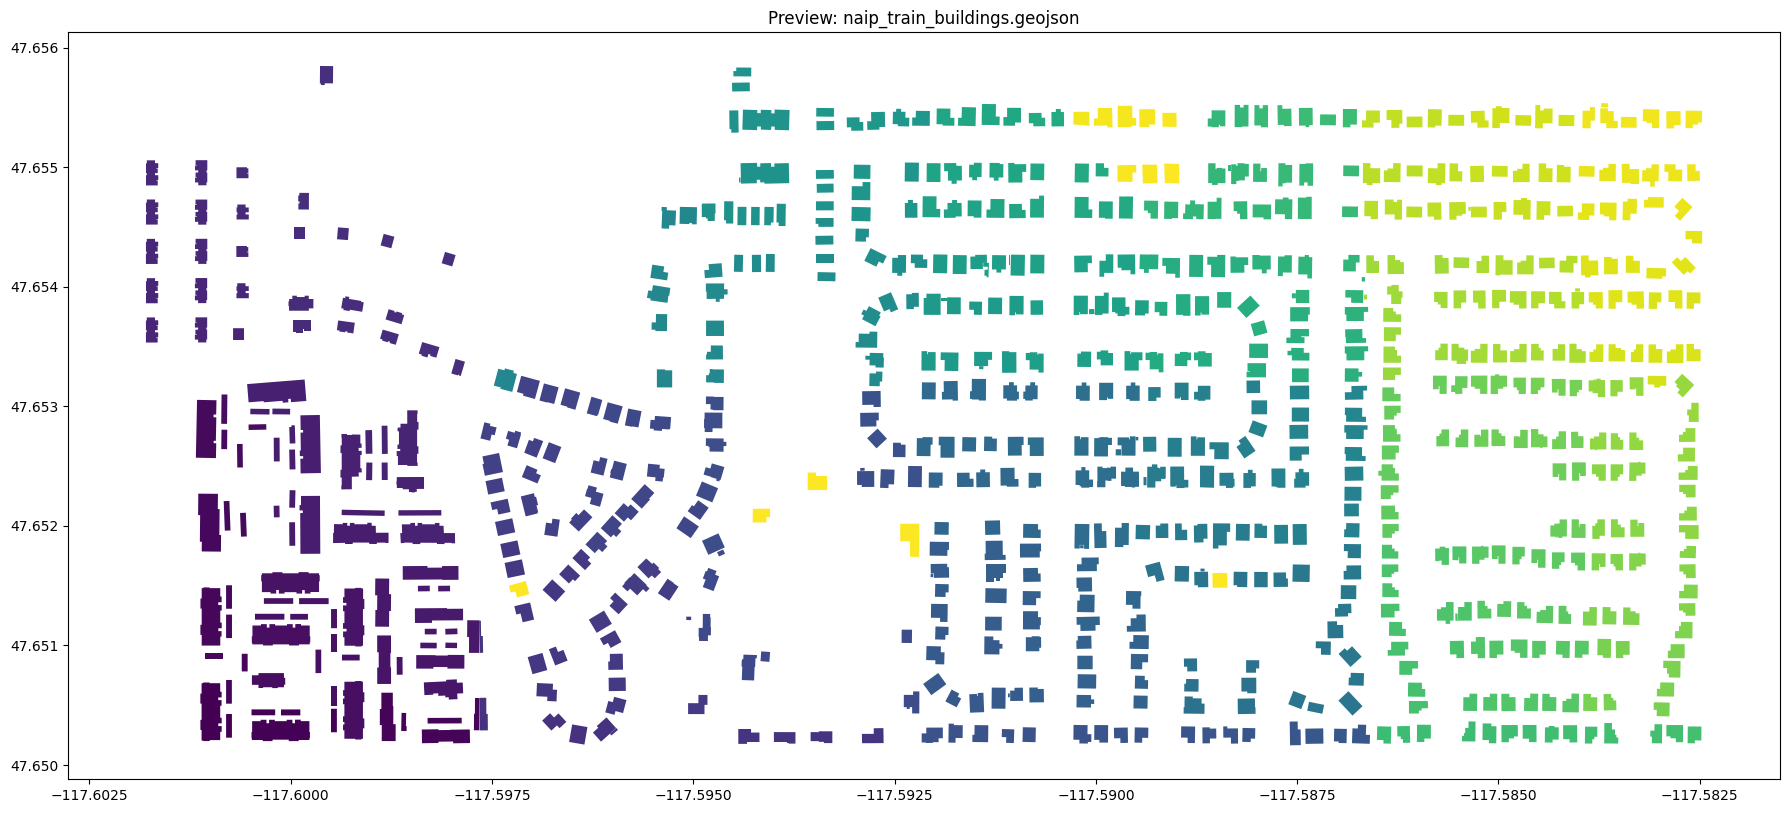

In [31]:
geoai.print_vector_info(train_vector_path, figsize=(18, 10))

### Interactive visualization

In [32]:
geoai.view_vector_interactive(train_vector_path, tiles=train_raster_url)

In [33]:
geoai.view_vector_interactive(
    train_vector_path,
    style_kwds={"color": "red", "fillOpacity": 0},
    tiles=train_raster_url,
)

In [34]:
geoai.view_vector_interactive(train_vector_path, tiles="Satellite")

In [35]:
geoai.view_raster(test_raster_url)

## 🧠 Model training

### Create training data

In [36]:
out_folder = "output"
tiles = geoai.export_geotiff_tiles(
    in_raster=train_raster_path,
    out_folder=out_folder,
    in_class_data=train_vector_path,
    tile_size=512,
    stride=256,
    buffer_radius=0,
)


Raster info for naip_train.tif:
  CRS: EPSG:26911
  Dimensions: 2503 x 1126
  Resolution: (0.5999999999999953, 0.5999999999996691)
  Bands: 4
  Bounds: BoundingBox(left=454780.8, bottom=5277567.0, right=456282.6, top=5278242.6)
Loaded 735 features from naip_train_buildings.geojson
Vector CRS: EPSG:4326
Reprojecting features from EPSG:4326 to EPSG:26911
Found 1 unique classes: ['building']


Generated: 36, With features: 36: 100%|██████████| 36/36 [00:08<00:00,  4.20it/s]


------- Export Summary -------
Total tiles exported: 36
Tiles with features: 36 (100.0%)
Average feature pixels per tile: 46795.0
Output saved to: output

------- Georeference Verification -------


### Train object detection model

In [ ]:
geoai.train_MaskRCNN_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/labels",
    output_dir=f"{out_folder}/models",
    num_channels=4,
    pretrained=True,
    batch_size=4,
    num_epochs=10,
    learning_rate=0.005,
    val_split=0.2,
)

Using device: cpu
Found 36 image files and 36 label files
Training on 28 images, validating on 8 images


Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:01<00:00, 112MB/s]


Epoch: 0, Batch: 0/7, Loss: 5.5604, Time: 119.13s


## 🔍 Model inference

In [ ]:
masks_path = "naip_test_prediction.tif"
model_path = f"{out_folder}/models/best_model.pth"

In [ ]:
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path,
    window_size=512,
    overlap=256,
    confidence_threshold=0.5,
    batch_size=4,
    num_channels=4,
)

## 🛠️ Post-processing

### Raster to vector conversion

In [ ]:
output_path = "naip_test_prediction.geojson"
buildings_gdf = geoai.raster_to_vector(masks_path, output_path)
buildings_gdf

In [ ]:
geoai.view_vector_interactive(buildings_gdf, tiles=test_raster_url)

### Building regularization

In [ ]:
regularized_gdf = geoai.regularize(
    data=buildings_gdf,
    simplify_tolerance=2.0,
    allow_45_degree=True,
    diagonal_threshold_reduction=30,
    allow_circles=True,
    circle_threshold=0.9,
)

In [ ]:
geoai.view_vector_interactive(regularized_gdf, tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=regularized_gdf,
    right_layer=test_raster_url,
    left_label="Regularized Buildings",
    right_label="NAIP Imagery",
    left_args={"style": {"color": "red", "fillOpacity": 0.3}},
    basemap=test_raster_url,
)

### Result comparison

In [ ]:
m = geoai.Map()
m.add_cog_layer(test_raster_url, name="NAIP")
m.add_gdf(
    buildings_gdf,
    style={"color": "yellow", "fillOpacity": 0},
    layer_name="Original",
    info_mode=None,
)
m.add_gdf(
    regularized_gdf,
    style={"color": "red", "fillOpacity": 0},
    layer_name="Regularized",
    info_mode=None,
)
legend = {
    "Original": "#ffff00",
    "Regularized": "#ff0000",
}
m.add_legend(title="Building Footprints", legend_dict=legend)
m

### Calculate geometric properties

In [ ]:
props_gdf = geoai.add_geometric_properties(
    regularized_gdf, area_unit="m2", length_unit="m"
)
props_gdf.head()

In [ ]:
geoai.view_vector_interactive(props_gdf, column="area_m2", tiles=test_raster_url)

### Save results

In [ ]:
props_gdf.to_file("naip_test_buildings.geojson")

## 🌐 Real-world applications  

The section demonstrates how to apply [pre-trained models](https://huggingface.co/giswqs/geoai/tree/main) to real-world scenarios.


### Building footprint extraction

In [ ]:
test_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip_test.tif"
)

In [ ]:
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
masks_path = "buildings_prediction.tif"
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="building_footprints_usa.pth",
    window_size=512,
    overlap=256,
    confidence_threshold=0.5,
    batch_size=4,
    num_channels=3,
)

In [ ]:
output_path = "buildings_prediction.geojson"
buildings_gdf = geoai.raster_to_vector(masks_path, output_path)
regularized_gdf = geoai.regularize(
    data=buildings_gdf,
    simplify_tolerance=2.0,
    allow_45_degree=True,
    diagonal_threshold_reduction=30,
    allow_circles=True,
    circle_threshold=0.9,
)
props_gdf = geoai.add_geometric_properties(
    regularized_gdf, area_unit="m2", length_unit="m"
)

In [ ]:
geoai.view_vector_interactive(props_gdf, tiles=test_raster_url)

### Solar panel detection

In [ ]:
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/solar_panels_davis_ca.tif"
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
masks_path = "solar_panels_prediction.tif"
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="solar_panel_detection.pth",
    window_size=400,
    overlap=100,
    confidence_threshold=0.4,
    batch_size=4,
    num_channels=3,
)

In [ ]:
output_path = "solar_panels_prediction.geojson"
regularized_gdf = geoai.orthogonalize(masks_path, output_path, epsilon=2)
props_gdf = geoai.add_geometric_properties(
    regularized_gdf, area_unit="m2", length_unit="m"
)

In [ ]:
geoai.view_vector_interactive(props_gdf, tiles=test_raster_url)

### Car detection

In [ ]:
test_raster_url = (
    "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/cars_test_7cm.tif"
)
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
masks_path = "cars_prediction.tif"
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="car_detection_usa.pth",
    window_size=512,
    overlap=256,
    confidence_threshold=0.5,
    batch_size=4,
    num_channels=3,
)

In [ ]:
output_path = "cars_prediction.geojson"
gdf = geoai.orthogonalize(masks_path, output_path, epsilon=2)

In [ ]:
geoai.view_vector_interactive(output_path, tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=output_path,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.2}},
    basemap=test_raster_url,
)

### Ship detection

In [ ]:
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/ships_sfo_test_15cm.tif"
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
masks_path = "ship_prediction.tif"
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="ship_detection.pth",
    window_size=512,
    overlap=256,
    confidence_threshold=0.5,
    batch_size=4,
    num_channels=3,
)

In [ ]:
output_path = "ship_prediction.geojson"
gdf = geoai.raster_to_vector(masks_path, output_path)

In [ ]:
geoai.view_vector_interactive(output_path, tiles=test_raster_url)

### Surface water mapping

In [ ]:
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/naip_water_test.tif"
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
masks_path = "water_prediction.tif"
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="water_detection.pth",
    window_size=512,
    overlap=128,
    confidence_threshold=0.3,
    batch_size=4,
    num_channels=4,
)

In [ ]:
output_path = "water_prediction.geojson"
gdf = geoai.raster_to_vector(
    masks_path, output_path, min_area=1000, simplify_tolerance=1
)
gdf = geoai.add_geometric_properties(gdf)

In [ ]:
geoai.view_vector_interactive(gdf, tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=gdf,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.4}},
    basemap=test_raster_url,
)

### Wetland mapping

In [ ]:
test_raster_url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/naip/m_4609932_nw_14_1_20100629.tif"
test_raster_path = geoai.download_file(test_raster_url)

In [ ]:
geoai.view_raster(test_raster_url)

In [ ]:
geoai.object_detection(
    test_raster_path,
    masks_path,
    model_path="wetland_detection.pth",
    window_size=512,
    overlap=256,
    confidence_threshold=0.3,
    batch_size=4,
    num_channels=4,
)

In [ ]:
output_path = "wetland_prediction.geojson"
gdf = geoai.raster_to_vector(
    masks_path, output_path, min_area=1000, simplify_tolerance=1
)
gdf = geoai.add_geometric_properties(gdf)

In [ ]:
geoai.view_vector_interactive(gdf, tiles=test_raster_url)

In [ ]:
geoai.create_split_map(
    left_layer=gdf,
    right_layer=test_raster_url,
    left_args={"style": {"color": "red", "fillOpacity": 0.4}},
    basemap=test_raster_url,
)